# Chapter 4 Hypothesis testing

## Example 4.3 Two samples

Test the difference of two means. The box-plot is not helpful.

grp =
  Columns 1 through 13
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 14 through 26
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 27 through 39
     2     2     2     2     2     2     2     2     2     2     2     2     2
  Columns 40 through 41
     2     2


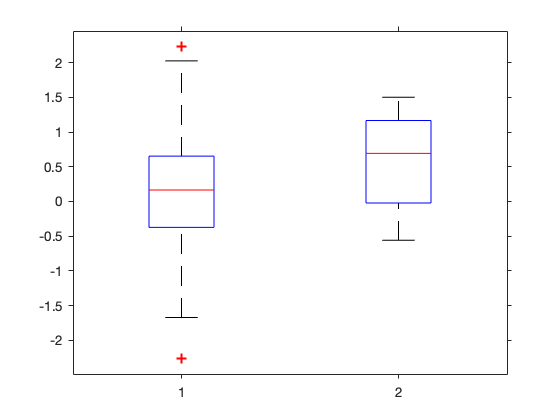

In [10]:
rng = 100;
x = normrnd(0, 1, [26,1]);
y = normrnd(0.5, 0.8, [15,1]);
grp = [ones(1, 26), ones(1, 15)*2];
grp
boxplot([x;y], grp)

### Example 4.11 Binomial Test
Power function $p \mapsto P_p(X \ge 59)$.

In [2]:
pow_bin = @(p) 1 - binocdf(59, 100, p)


pow_bin =

  function_handle with value:

    @(p)1-binocdf(59,100,p)



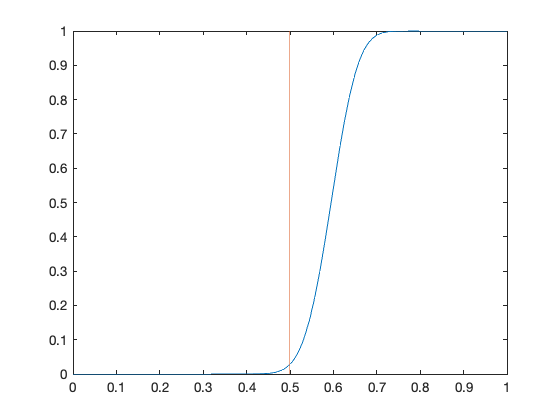

In [6]:
fplot(pow_bin, [0,1])
vline(0.5, '-')

### Fig. 4.4 
The function $x \mapsto P_{0.5}(X\ge x)$ for $X \sim Bin(100, 0.5)$.

In [8]:
bino = @(x)  1 - binocdf(x, 100, 0.5);

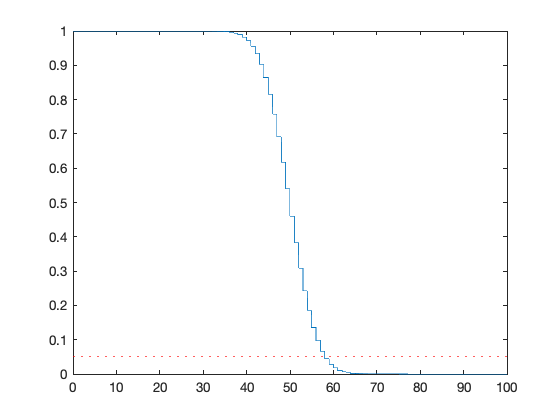

In [9]:
fplot(bino, [0, 100])

hline(0.05)

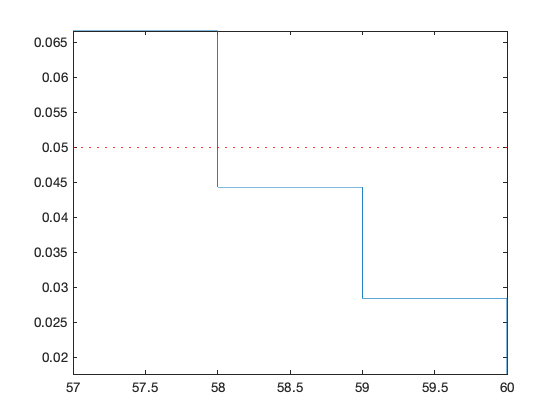

In [11]:
fplot(bino, [57, 60])

hline(0.05)

### Figure 4.5 Power function for the Gauss test
- Red. One sided test $H_0: \mu \le 0$ vs $H_1: \mu > 0$
- Blue. One sided test $H_0: \mu \ge 0$ vs $H_1: \mu < 0$
- Yellow. Two-sided test $H_0 \mu = \mu_0$ vs $H_1: \mu \ne \mu_0$

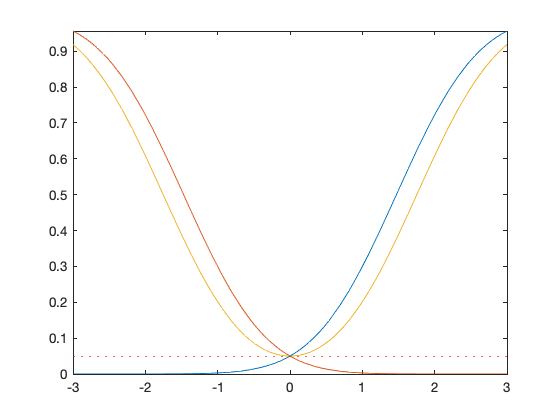

In [59]:
n = 5;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])

hold on

pow_gauss_L = @(mu) normcdf(-norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_L, [-3,3])

pow_gauss_2 = @(mu) 1 - normcdf( norminv(1-a0/2)  - sqrt(n) .*(mu - mu0) ./ sigma) +  normcdf(norminv(a0/2) - sqrt(n) .*(mu-mu0) ./sigma);
fplot(pow_gauss_2, [-3,3])


hline(0.05)
hold off
